In [1]:
import torch
def xywhn2xyxy(x, w=640, h=640, padw=0, padh=0, scale=1.):
    # Convert nx4 boxes from [x, y, w, h] normalized to [x1, y1, x2, y2] where xy1=top-left, xy2=bottom-right
    y = x.clone() if isinstance(x, torch.Tensor) else np.copy(x)
    h = scale.shape[0]
    w = scale.shape[1]
    y[:, 0] = (w * (x[:, 0] - x[:, 2] / 2) + padw)
    y[:, 1] = (h * (x[:, 1] - x[:, 3] / 2) + padh)
    y[:, 2] = (w * (x[:, 0] + x[:, 2] / 2) + padw)
    y[:, 3] = (h * (x[:, 1] + x[:, 3] / 2) + padh)
    return y

In [2]:
from PIL import ImageDraw
from PIL import Image
def pil_draw_rect(image, point1, point2):
    draw = ImageDraw.Draw(image)
    draw.rectangle((point1, point2), outline=(0, 0, 255), width=5)
    return image

284.23828000000003 223.896458
434.807672 292.887754
316.503448 234.961134
405.61604 281.823078
58.38395999999999 38.40081
208.953352 131.47419
41.483224000000014 29.93967599999999
218.17210400000002 138.633704
259.655792 9.112094999999997
450.17233600000003 107.392257
281.165672 221.94402800000003
444.026424 295.491296
278.09283200000004 15.620497000000002
434.807904 96.97839100000002
281.16567200000003 130.17256999999998
448.6358 205.67256999999998
299.60247999999996 151.650961
424.05284800000004 188.75015100000002
284.23828000000003 223.896458
434.807672 292.887754
316.503448 234.961134
405.61604 281.823078
58.38395999999999 38.40081
208.953352 131.47419
41.483224000000014 29.93967599999999
218.17210400000002 138.633704
259.655792 9.112094999999997
450.17233600000003 107.392257
281.165672 221.94402800000003
444.026424 295.491296
278.09283200000004 15.620497000000002
434.807904 96.97839100000002
281.16567200000003 130.17256999999998
448.6358 205.67256999999998
299.60247999999996 151.6

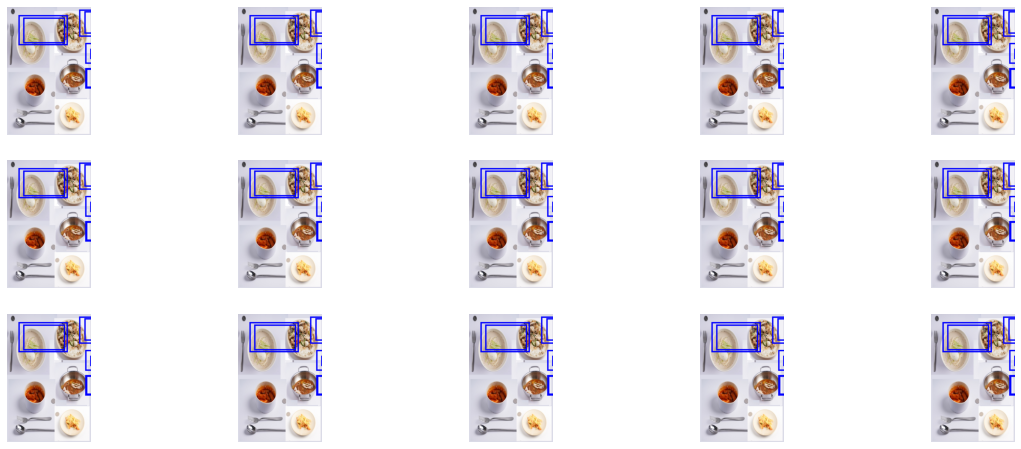

In [3]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
img_root = '/opt/ml/data/images/test'
pred_root = '/opt/ml/yolov5/runs/detect/exp/labels'
# pred_root = '/opt/ml/data/labels/train'

fig, ax = plt.subplots(3, 5, figsize=(20,8))

lbl_list = random.choices(os.listdir(pred_root), k=15)
for row in range(3):
    for col in range(5):
        lbl = lbl_list.pop()
        cur_lbl = os.path.join(pred_root, lbl)
        cur_img = os.path.join(img_root, os.path.splitext(lbl)[0] + '.png')
        with open(cur_lbl, 'r') as f:
            label = f.readlines()
        tmp = []
        for lbl in label:
            tmp2 = []
            for idx, val in enumerate(lbl.rstrip().split()):
                if not idx:
                    tmp2.append(int(val))
                else:
                    tmp2.append(float(val))
            tmp.append(tmp2)
        tmp = np.array(tmp)
        img = Image.open(cur_img)

        tmp[:, 1:] = xywhn2xyxy(tmp[:, 1:], w=640, h=640, padw=0, padh=0, scale=np.array(img))
        for box in tmp:
            x1, y1 = box[1:3]
            print(x1, y1)
            x2, y2 = box[3:5]
            print(x2, y2)
            img = pil_draw_rect(img, (x1, y1), (x2, y2))

        ax[row][col].imshow(img)
        ax[row][col].axis('off')
    
plt.show()

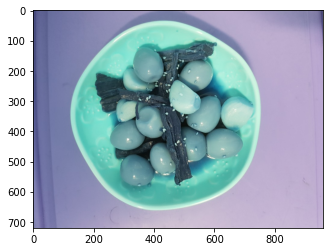

In [11]:
import cv2
import matplotlib.pyplot as plt
img_root = '/opt/ml/data/images/train'
img_path = '09_093_09013002_160932600440418_0.jpg'
img = cv2.imread(os.path.join(img_root, img_path))
plt.imshow(img)

In [12]:
img.shape

(720, 960, 3)

In [4]:
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from PIL.ExifTags import TAGS
import numpy as np
import cv2

img_root = '/opt/ml/data/images/train'
img_path = '09_093_09013002_160957096087973_1.jpg'

img = cv2.imread(os.path.join(img_root, img_path))
height = img.shape[0]
width = img.shape[1]

image = Image.open(os.path.join(img_root, img_path))
exifdata = image.getexif()
print()
raw_height, raw_width = 0, 0
for tag_id in exifdata:
    tag = TAGS.get(tag_id, tag_id)
    data = exifdata.get(tag_id)
    if isinstance(data, bytes):
        data = data.decode()
    if tag == 'ImageWidth':
        raw_width = data
    if tag == 'ImageLength':
        raw_height = data
    print(f"{tag:25}: {data}")

print('prev_roate: ', img.shape)
if height != raw_height:
    img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    print('rotate: ', img.shape)
    print('metadata: ', raw_height, raw_width)

plt.imshow(img)

(4248, 5664, 3)
4248 5664
{}


In [13]:
img2.shape

(4248, 5664, 3)